In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

###### https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/
###### https://www.digitalvidya.com/blog/the-top-5-clustering-algorithms-data-scientists-should-know/

In [108]:
centers = [[1, 1], [-1, -1], [1, -1]]

X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

In [109]:
X

array([[ 0.84022039,  1.14802236],
       [-1.15474834, -1.2041171 ],
       [ 0.67863613,  0.72418009],
       ...,
       [ 0.26798858, -1.27833405],
       [-0.88628813, -0.30293249],
       [ 0.60046048, -1.29605472]])

In [110]:
scaler = StandardScaler()

X_scale = scaler.fit_transform(X)
X_scale

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

In [111]:
len(X_scale[:, 0])

750

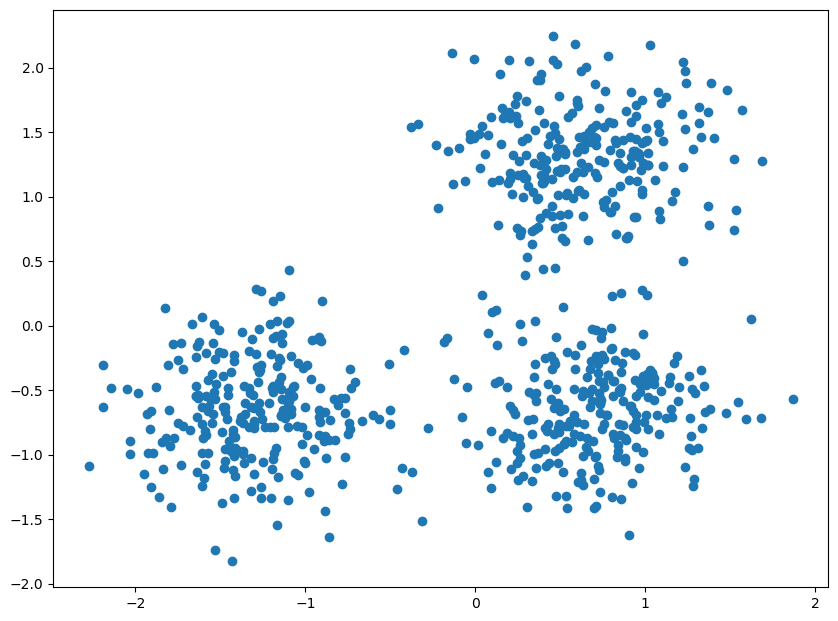

In [112]:
plt.rcParams.update({"figure.figsize": (10, 7.5), "figure.dpi": 100})
plt.scatter(X_scale[:, 0], X_scale[:, 1])

In [113]:
dbSCAN_Model = DBSCAN(eps=0.3, min_samples=10).fit(X_scale)

In [85]:
arr = list()
for i in np.arange(0.1, 3, 0.1):
    for j in range(1, 20):
        dbSCAN_Model = DBSCAN(eps=i, min_samples=j).fit(X_scale)
        noise_percentage = (
            list(dbSCAN_Model.labels_).count(-1) / len(dbSCAN_Model.labels_) * 100
        )
        arr.append([i, j, noise_percentage])

In [88]:
min = 0
minArr = list()
for i in range(len(arr)):
    if arr[i][2] <= min:
        min = arr[i][2]
        minArr.append(arr[i])
print(minArr)

[[0.1, 1, 0.0], [0.2, 1, 0.0], [0.30000000000000004, 1, 0.0], [0.4, 1, 0.0], [0.5, 1, 0.0], [0.5, 2, 0.0], [0.5, 3, 0.0], [0.5, 4, 0.0], [0.5, 5, 0.0], [0.5, 6, 0.0], [0.5, 7, 0.0], [0.5, 8, 0.0], [0.5, 9, 0.0], [0.5, 10, 0.0], [0.5, 11, 0.0], [0.5, 12, 0.0], [0.5, 13, 0.0], [0.5, 14, 0.0], [0.5, 15, 0.0], [0.5, 16, 0.0], [0.5, 17, 0.0], [0.5, 18, 0.0], [0.5, 19, 0.0], [0.6, 1, 0.0], [0.6, 2, 0.0], [0.6, 3, 0.0], [0.6, 4, 0.0], [0.6, 5, 0.0], [0.6, 6, 0.0], [0.6, 7, 0.0], [0.6, 8, 0.0], [0.6, 9, 0.0], [0.6, 10, 0.0], [0.6, 11, 0.0], [0.6, 12, 0.0], [0.6, 13, 0.0], [0.6, 14, 0.0], [0.6, 15, 0.0], [0.6, 16, 0.0], [0.6, 17, 0.0], [0.6, 18, 0.0], [0.6, 19, 0.0], [0.7000000000000001, 1, 0.0], [0.7000000000000001, 2, 0.0], [0.7000000000000001, 3, 0.0], [0.7000000000000001, 4, 0.0], [0.7000000000000001, 5, 0.0], [0.7000000000000001, 6, 0.0], [0.7000000000000001, 7, 0.0], [0.7000000000000001, 8, 0.0], [0.7000000000000001, 9, 0.0], [0.7000000000000001, 10, 0.0], [0.7000000000000001, 11, 0.0], [

In [114]:
list(dbSCAN_Model.labels_).count(-1) / len(dbSCAN_Model.labels_) * 100

2.4

In [115]:
dbSCAN_Model

DBSCAN(eps=0.3, min_samples=10)

In [116]:
dbSCAN_Model.labels_[:10]

array([0, 1, 0, 2, 0, 1, 1, 2, 0, 0], dtype=int64)

In [117]:
set(dbSCAN_Model.labels_)

{-1, 0, 1, 2}

In [118]:
len(dbSCAN_Model.labels_)

750

In [119]:
core_samples_mask = np.zeros_like(dbSCAN_Model.labels_, dtype=bool)
core_samples_mask[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

In [120]:
dbSCAN_Model.core_sample_indices_[:10]

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10], dtype=int64)

In [121]:
core_samples_mask[dbSCAN_Model.core_sample_indices_] = True
core_samples_mask[:10]

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True])

In [122]:
n_clusters_ = len(set(dbSCAN_Model.labels_)) - (1 if -1 in dbSCAN_Model.labels_ else 0)
n_clusters_

3

In [123]:
n_noise_ = list(dbSCAN_Model.labels_).count(-1)
n_noise_

18

In [124]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


- Homogeneity: If the clustering algorithm groups all apple images into one cluster, all banana images into another cluster, and all orange images into a third cluster, then the homogeneity score will be high because each cluster is homogeneous (contains images of only one type of fruit).

- Completeness: If all images of apples, regardless of slight variations (like different shades of red), are placed into the same cluster, completeness will be high because all apples are together. If some apple images are mistakenly grouped with oranges, completeness will be low.

In [125]:
print(
    "Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, dbSCAN_Model.labels_)
)
print(
    "Completeness: %0.3f"
    % metrics.completeness_score(labels_true, dbSCAN_Model.labels_)
)

Homogeneity: 0.953
Completeness: 0.883


- V-measure: A balance between homogeneity and completeness.
- Adjusted Rand Index: Agreement between the true labels and clustering.
- Adjusted Mutual Information: Shared information between true labels and clustering, adjusted for chance.
- Silhouette Coefficient: How well-separated the clusters are from each other.

In [127]:
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, dbSCAN_Model.labels_))
print(
    "Adjusted Rand Index: %0.3f"
    % metrics.adjusted_rand_score(labels_true, dbSCAN_Model.labels_)
)
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, dbSCAN_Model.labels_)
)
print(
    "Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, dbSCAN_Model.labels_)
)

V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


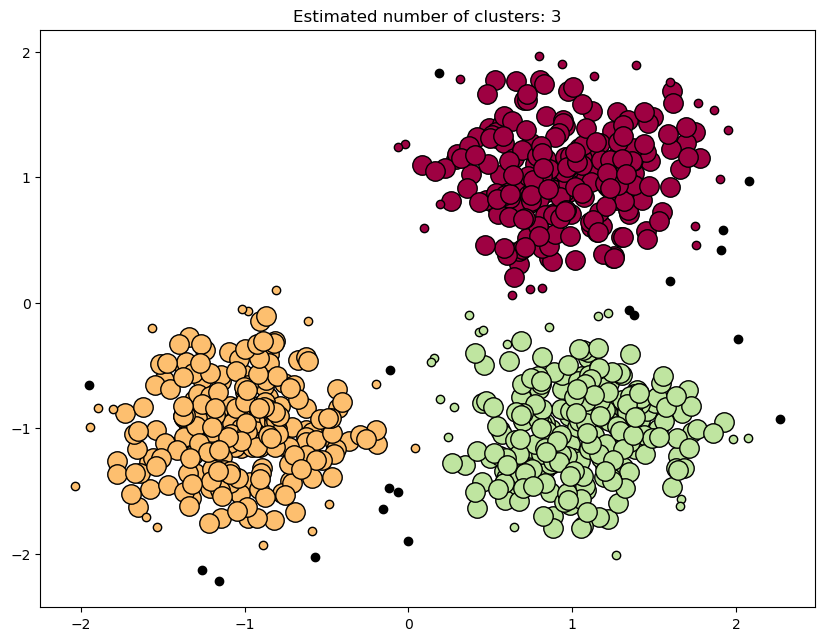

In [128]:
unique_labels = set(dbSCAN_Model.labels_)

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = dbSCAN_Model.labels_ == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

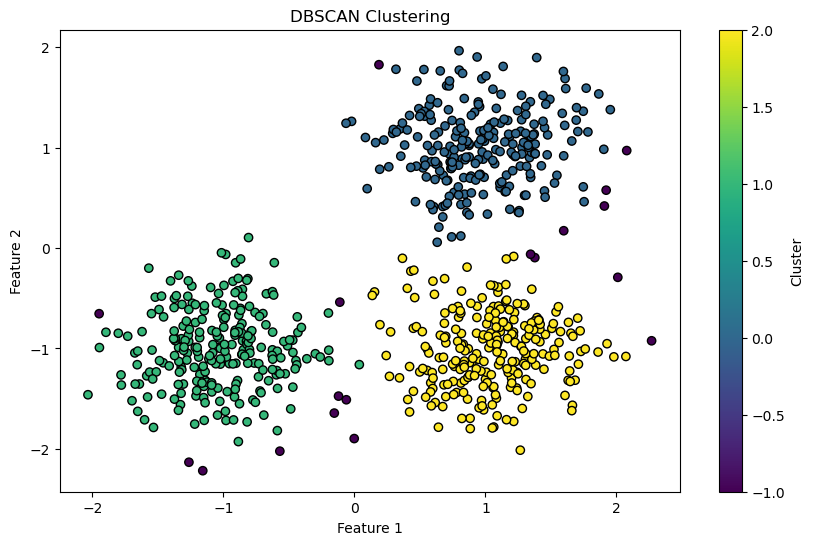

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbSCAN_Model.labels_, cmap="viridis", marker="o", edgecolor="k")
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()